# Pyber Challenge

## Background 
V. Isualize has given you and Omar a brand-new assignment. Using your Python skills and knowledge of Pandas, you’ll create a summary DataFrame of the ride-sharing data by city type. Then, using Pandas and Matplotlib, you’ll create a multiple-line graph that shows the total weekly fares for each city type. Finally, you’ll submit a written report that summarizes how the data differs by city type and how those differences can be used by decision-makers at PyBer.

## What You're Creating
This new assignment consists of two technical analysis deliverables and a written report to present your results. You will submit the following:

- Deliverable 1: A ride-sharing summary DataFrame by city type
- Deliverable 2: A multiple-line chart of total fares for each city type
- Deliverable 3: A written report for the PyBer analysis (README.md)

###  Loading and Reading CSV files

In [78]:
# Add Matplotlib inline magic command
%matplotlib inline

In [79]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

In [80]:
# File to Load (Remember to change these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

In [81]:
city_data_df.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [82]:
ride_data_df.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344


### Merge the DataFrames

In [83]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


## Deliverable 1: A ride-sharing summary DataFrame by city type (35 points)
### Deliverable 1 Instructions
Using the Pandas <code>groupby()</code> function with the <code>count()</code> and <code>sum()</code> methods on PyBer DataFrame columns, get the total number of rides, total number of drivers, and the total fares for each city type. Then, calculate the average fare per ride and average fare per driver for each city type. Finally, add this data to a new DataFrame, then format the columns.

1. Download the <code>PyBer_Challenge_starter_code.ipynb</code> file into your <code>PyBer_Analysis</code> folder and rename it <code>PyBer_Challenge.ipynb</code>.
2. Use the step-by-step instructions below to add code where indicated by the numbered comments in the starter code file.
3. In Step 1, use the <code>groupby()</code> function to create a Series of data that has the type of city as the index, then apply the <code>count()</code> method to the "ride_id" column.
4. In Step 2, use the <code>groupby()</code> function to create a Series of data that has the type of city as the index, then apply the <code>sum()</code> method to the "driver_count" column.
5. In Step 3, use the <code>groupby()</code> function to create a Series of data that has the type of city as the index, then apply the <code>sum()</code> method to the "fare" column.
6. In Step 4, calculate the average fare per ride by city type by dividing the sum of all the fares by the total rides.
7. In Step 5, calculate the average fare per driver by city type by dividing the sum of all the fares by the total drivers.
8. In Step 6, create a PyBer summary DataFrame with all the data gathered from Steps 1-5, using the column names shown.
9. In Step 7, use the provided code snippet to remove the index name ("type") from the PyBer summary DataFrame.
10. In Step 8, format the columns of the Pyber summary DataFrame.

## Deliverable 1 Requirements
You will earn a perfect score for Deliverable 1 by completing all requirements below:

- The total number of rides for each city type is retrieved. (5 pt)
- The total number of drivers for each city type is retrieved. (5 pt)
- The sum of the fares for each city type is retrieved. (5 pt)
- The average fare per ride for each city type is calculated. (5 pt)
- The average fare per driver for each city type is calculated. (5 pt)
- A PyBer summary DataFrame is created. (5 pt)
- The PyBer summary DataFrame is formatted as shown in the example. (5 pt)

In [102]:
#  1. Get the total rides for each city type
total_rides = pyber_data_df.groupby(["type"]).count()["ride_id"]
total_rides

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [100]:
# 2. Get the total drivers for each city type
total_drivers = city_data_df.groupby(["type"]).sum()["driver_count"]
total_drivers

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [101]:
#  3. Get the total amount of fares for each city type
total_fares = pyber_data_df.groupby(["type"]).sum()["fare"]
total_fares

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [114]:
#  4. Get the average fare per ride for each city type.
average_fares = total_fares / total_rides
average_fares

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
dtype: float64

In [115]:
# 5. Get the average fare per driver for each city type. 
average_driver_fares = total_fares/total_drivers
average_driver_fares

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [119]:
#  6. Create a PyBer summary DataFrame. 
pyber_summary_df = pd.DataFrame({"Total Rides":total_rides,
                                "Total Drivers":total_drivers,
                                "Total Fares":total_fares,
                                "Average Fare per Ride":average_fares,
                                "Average Fare per Driver":average_driver_fares})
pyber_summary_df.head()

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [120]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None

In [121]:
#  8. Format the columns.
pyber_summary_df["Total Fares"] = pyber_summary_df["Total Fares"].map("${:,.2f}".format)
pyber_summary_df["Average Fare per Ride"] = pyber_summary_df["Average Fare per Ride"].map("${:,.2f}".format)
pyber_summary_df["Average Fare per Driver"] = pyber_summary_df["Average Fare per Driver"].map("${:,.2f}".format)

pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,1625,2405,"$39,854.38",$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

### Deliverable 2 Instructions
Using your Pandas skills and two new functions, <code>pivot()</code> and <code>resample()</code>, create a multiple-line graph that shows the total fares for each week by city type.

Use the step-by-step instructions below to add code where indicated by the numbered comments in the starter code file:

1. In Step 1, create a new DataFrame with multiple indices using the <code>groupby()</code> function on the "type" and "date" columns of the <code>pyber_data_df</code> DataFrame, then apply the <code>sum()</code> method on the "fare" column to show the total fare amount for each date.

2. In Step 2, use the provided code snippet to reset the index. This is needed to use the <code>pivot()</code> function in the next step (Step 3).

3. In Step 3, use the <code>pivot()</code> function to convert the DataFrame from the previous step so that the index is the "date," each column is a city "type," and the values are the "fare."
    - After this step, you’ll see that each cell has the total fare for the date and time, as shown in the following image.

<b>Note:</b> In cells where there is no fare to be summed for that row, the cell will be filled with NaNs.

4. In Step 4, create a new DataFrame by using the <code>loc</code> method on the following date range: 2019-01-01 through 2019-04-29.
5. In Step 5, use the provided code snippet to reset the index of the DataFrame from the previous step (Step 4) to a datetime data type. This is necessary to use the <code>resample()</code> method in Step 7.
6. In Step 6, use the provided code snippet, <code>df.info()</code>, to check that the "date" is a <code>datetime</code> data type.
7. In Step 7, create a new DataFrame by applying the <code>resample()</code> function to the DataFrame you modified in Step 5. Resample the data in weekly bins, then apply the <code>sum()</code> method to get the total fares for each week.
8. Finally, in Step 8, graph the resampled DataFrame from Step 7 using the object-oriented interface method and the <code>df.plot()</code> method, as well as the Matplotlib <code>"fivethirtyeight"</code> graph style code snippet provided in the starter code. Annotate the y-axis label and the title, then use the appropriate code to save the figure as <code>PyBer_fare_summary.png</code> in your "analysis" folder.
   
    


In [129]:
# Dependencies
import numpy as np 
# Load in csv
pyber_ride_df = pd.read_csv("Resources/PyBer_ride_data.csv")

In [150]:
# 1. Read the merged DataFrame
pyber_ride_df

,Month,Avg. Fare ($USD)
0,Jan,10.02
1,Feb,23.24
2,Mar,39.20
3,April,35.42
4,May,32.34
5,June,27.04
6,July,43.82
7,Aug,10.56
8,Sept,11.85
9,Oct,27.90


In [190]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
total_fare_by_date = pyber_data_df.groupby(["date", "type"]).sum()[["fare"]]
total_fare_by_date.head(10)

,,fare
date,type,
2019-01-01 00:08:16,Urban,37.91
2019-01-01 00:46:46,Suburban,47.74
2019-01-01 02:07:24,Suburban,24.07
2019-01-01 03:46:50,Urban,7.57
2019-01-01 05:23:21,Urban,10.75
2019-01-01 09:45:36,Rural,43.69
2019-01-01 12:32:48,Suburban,25.56
2019-01-01 14:40:14,Urban,5.42
2019-01-01 14:42:25,Urban,12.31


In [191]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
# df = df.reset_index()
total_fare_by_date = total_fare_by_date.reset_index()

In [192]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
total_fare_by_date_pivot = total_fare_by_date.pivot(index="date",columns="type", values="fare")
total_fare_by_date_pivot.head(10)

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
2019-01-01 09:45:36,43.69,NaN,NaN
2019-01-01 12:32:48,NaN,25.56,NaN
2019-01-01 14:40:14,NaN,NaN,5.42
2019-01-01 14:42:25,NaN,NaN,12.31


In [194]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
first_2019 = total_fare_by_date_pivot.loc['2019-01-01':'2019-04-29']
first_2019.head(10)

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
2019-01-01 09:45:36,43.69,NaN,NaN
2019-01-01 12:32:48,NaN,25.56,NaN
2019-01-01 14:40:14,NaN,NaN,5.42
2019-01-01 14:42:25,NaN,NaN,12.31


In [172]:
# Dependencies
import datetime

In [196]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
# df.index = pd.to_datetime(df.index)
first_2019.index = pd.to_datetime(first_2019.index)

In [198]:
# 7. Check that the datatype for the index is datetime using df.info()
first_2019.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2196 entries, 2019-01-01 00:08:16 to 2019-04-28 19:35:03
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     114 non-null    float64
 1   Suburban  573 non-null    float64
 2   Urban     1509 non-null   float64
dtypes: float64(3)
memory usage: 68.6 KB


In [202]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
weekly_summary_df = first_2019.resample("W").sum()
weekly_summary_df

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


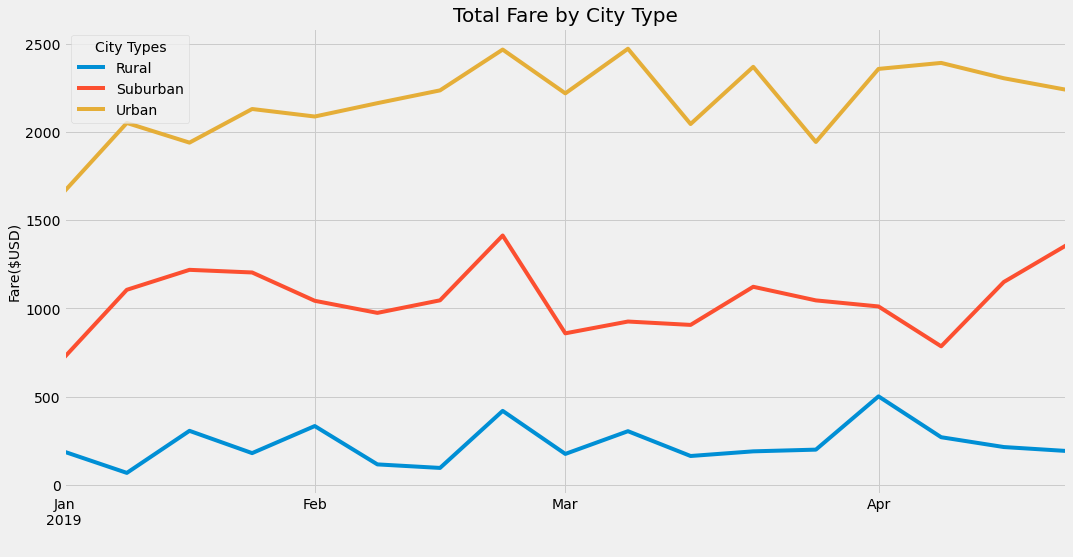

In [201]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 
weekly_summary_df.plot(figsize=(16,8))
plt.title("Total Fare by City Type", fontsize=20)
plt.xlabel(" ")
plt.ylabel("Fare($USD)", fontsize=14)
plt.grid(True)
plt.legend(loc="best",title="City Types")

# Import the style from Matplotlib.
from matplotlib import style

# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')

plt.savefig("analysis/PyBer_fare_summary.png")

plt.show()

## Deliverable 2 Requirements
You will earn a perfect score for Deliverable 2 by completing all requirements below:

- A DataFrame was created using the <code>groupby()</code> function on the "type" and "date" columns, and the <code>sum()</code> method is applied on the "fare" column to show the total fare amount for each date and time. (10 pt)
- A DataFrame was created using the <code>pivot()</code> function where the index is the "date," the columns are the city "type," and the values are the "fare." (10 pt)
- A DataFrame was created using the loc method on the date range: <code>2019-01-01</code> through <code>2019-04-29</code>. (5 pt)
- A DataFrame was created using the <code>resample()</code> function in weekly bins and shows the sum of the fares for each week. (10 pt)
- An annotated chart showing the total fares by city type is created and saved to the "analysis" folder. (10 pt)

## Deliverable 3: A written report for the PyBer analysis (20 points)
### Deliverable 3 Instructions
Use your repository README file to write your analysis of how to address any disparities in the ride-sharing data among the city types.

The analysis should contain the following:

1. Overview of the analysis: Explain the purpose of the new analysis.
2. Results: Using images from the summary DataFrame and multiple-line chart, describe the differences in ride-sharing data among the different city types.
3. Summary: Based on the results, provide three business recommendations to the CEO for addressing any disparities among the city types.

### Deliverable 3 Requirements
#### Structure, Organization, and Formatting (6 points)

The written analysis has the following structure, organization, and formatting:

- There is a title, and there are multiple sections. (2 pt)
- Each section has a heading and subheading. (2 pt)
- Links to images are working and displayed correctly. (2 pt)
 
#### Analysis (14 points)
The written analysis has the following:

1. Overview of the analysis:
- The purpose of the new analysis is well defined. (3 pt)
2. Results:
- There is a description of the differences in ride-sharing data among the different city types. Ride-sharing data include the total rides, total drivers, total fares, average fare per ride and driver, and total fare by city type. (7 pt)
3. Summary:
- There is a statement summarizing three business recommendations to the CEO for addressing any disparities among the city types. (4 pt)
